# UK Salaries Analysis

This analysis digs into a random dataset of 50,000 records which analyses the data in various ways in order to gain business insights into the population.

In [1]:
# Check Python version for compatibility/reference
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/Applications/JupyterLab.app/Contents/Resources/jlab_server/bin/python
3.8.12 | packaged by conda-forge | (default, Sep 16 2021, 01:59:00) 
[Clang 11.1.0 ]
sys.version_info(major=3, minor=8, micro=12, releaselevel='final', serial=0)


In [2]:
# Install seaborn and openpyxl packages in the current Jupyter kernel
!{sys.executable} -m pip install seaborn openpyxl

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached numpy-1.21.2-cp38-cp38-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached matplotlib-3.4.3-cp38-cp38-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached scipy-1.7.1-cp38-cp38-macosx_10_9_x86_64.whl (32.6 MB)
  Using cached pandas-1.3.3-cp38-cp38-macosx_10_9_x86_64.whl (11.4 MB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached Pillow-8.3.2-cp38-cp38-macosx_10_10_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-macosx_10_9_x86_64.whl (61 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Consider adding th

In [3]:
# Import requisite data science libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Check Package version numbering for compatibility/reference
print(f"{'Pandas version:'} \t{pd.__version__}")
print(f"{'Matplotlib version:'} \t{mpl.__version__}")
print(f"{'Seaborn version:'} \t{sns.__version__}")

Pandas version: 	1.3.3
Matplotlib version: 	3.4.3
Seaborn version: 	0.11.2


In [5]:
# Set up matplotlib
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
# Read the salary data in from an Excel file
df = pd.read_excel('../data_files/salaries.xlsx', sheet_name='Data', index_col=None)

In [7]:
# Check formatting of dataframe
df.head(2)

,employee_id,job_title,job_family,corp_title,city,country,gender,date_of_birth,start_date,salary
0,100002,Software Engineering Manager,Management,Vice President,London,England,Male,1958-12-30,2013-04-28,118000
1,100003,IT Support,Technical (Jnr),Associate,London,England,Female,1967-04-27,2020-01-27,48700


#### Prepare Augmented Dataframe

Calculations for age and length of service are added to the dataframe to facilitate analysis.

In [8]:
seconds_per_year = 60 * 60 * 24 * 365.25

# Calculate age in years to 2 d.p.
df['age_in_years'] = round((pd.to_datetime('now') - df['date_of_birth']).dt.total_seconds() / seconds_per_year, 2)

# Calculate length of service in years to 2 d.p.
df['los_in_years'] = round((pd.to_datetime('now') - df['start_date']).dt.total_seconds() / seconds_per_year, 2)

In [9]:
# Check the 'sal' dataframe now has the added calculations for age and length of service
df.head(2)

,employee_id,job_title,job_family,corp_title,city,country,gender,date_of_birth,start_date,salary,age_in_years,los_in_years
0,100002,Software Engineering Manager,Management,Vice President,London,England,Male,1958-12-30,2013-04-28,118000,62.74,8.41
1,100003,IT Support,Technical (Jnr),Associate,London,England,Female,1967-04-27,2020-01-27,48700,54.41,1.66


#### Remove Executives from Analysis

The executives should be removed from the analysis since there is only 6 of them in the population and their salaries wildly skew the analysis. Any analysis undertaken on this population should be completed separately.

In [10]:
# Verify number of executives
num_execs = df['corp_title'].value_counts()['Managing Director']
f"{'Number of Executives:'} {num_execs}"

'Number of Executives: 6'

In [11]:
sal = df.drop(index=df[df['corp_title'] == 'Managing Director'].index)

## Data Analysis
Let's understand the data more by doing some provisional analysis.

In [12]:
# Check the data columns and datatypes
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   employee_id    49994 non-null  int64         
 1   job_title      49994 non-null  object        
 2   job_family     49994 non-null  object        
 3   corp_title     49994 non-null  object        
 4   city           49994 non-null  object        
 5   country        49994 non-null  object        
 6   gender         49994 non-null  object        
 7   date_of_birth  49994 non-null  datetime64[ns]
 8   start_date     49994 non-null  datetime64[ns]
 9   salary         49994 non-null  int64         
 10  age_in_years   49994 non-null  float64       
 11  los_in_years   49994 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 5.0+ MB


In [13]:
# Get the number of unique cities
num_cities = sal['city'].nunique()
f"{'Number of Cities:'} {num_cities}"

'Number of Cities: 8'

In [14]:
# Get an array object of each of the cities
cities = sal['city'].unique()
cities

array(['London', 'Birmingham', 'Swansea', 'Manchester', 'Glasgow',
       'Cardiff', 'Cambridge', 'Edinburgh'], dtype=object)

In [15]:
# Get the mean salary for each of the corporate titles (in a logical custom order)
sal.groupby('corp_title').mean()['salary'].round(2).reindex(['Associate', 'Assistant Vice President', 'Vice President', 'Director', 'Managing Director'])

corp_title
Associate                    32307.38
Assistant Vice President     62988.41
Vice President               99582.52
Director                    119801.45
Managing Director                 NaN
Name: salary, dtype: float64

## Data Visualisations
#### Salary Distribution - by Corporate Title

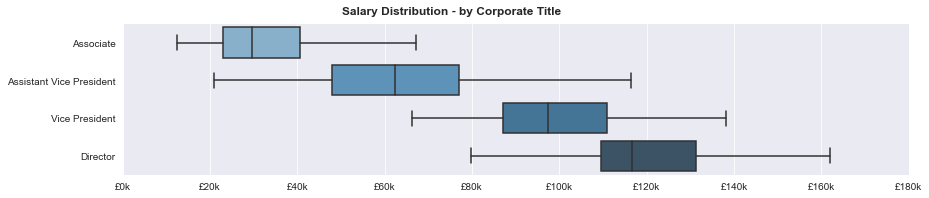

In [16]:
# Set up the box plot with the required logical ordering, size and removal of outliers
sal_by_ct = sns.catplot(x='salary',
                        y='corp_title',
                        data=sal,
                        kind='box',
                        showfliers=False,
                        height=3,
                        aspect=13/3,
                        palette='Blues_d',
                        order=['Associate', 'Assistant Vice President',
                               'Vice President', 'Director'])

# Get the ticks from the x axis
ticks = sal_by_ct.axes[0][0].get_xticks()

# Change the formatting for each of the ticks
xlabels = [f"{'£'}{x/1000:,.0f}{'k'}" for x in ticks]

# Set the formatting for the ticks
sal_by_ct.set_xticklabels(xlabels)

# Adjust spacing and set the chart and axe's titles
sal_by_ct.fig.subplots_adjust(top=0.9, bottom=0.2)
sal_by_ct.fig.suptitle('Salary Distribution - by Corporate Title',
                        fontsize=12, fontweight='bold')
sal_by_ct.set(xlabel='', ylabel='')

plt.show()

#### Salary Distribution - by Location

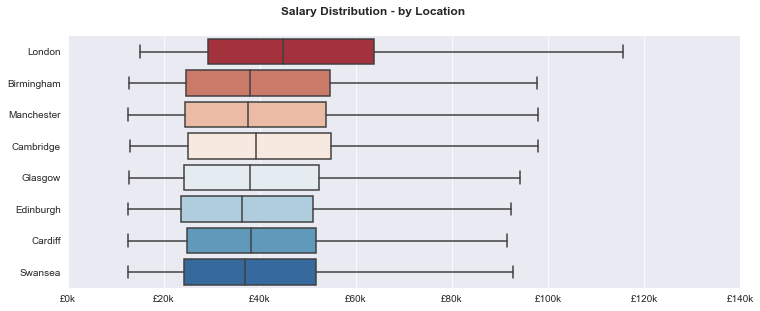

In [17]:
# Set up the box plot with the required logical ordering, size and removal of outliers
sal_by_ct = sns.catplot(x='salary',
                        y='city',
                        data=sal,
                        kind='box',
                        showfliers=False,
                        height=5,
                        aspect=13/6,
                        palette='RdBu',
                        order=['London', 'Birmingham', 'Manchester', 'Cambridge',                                       'Glasgow', 'Edinburgh', 'Cardiff', 'Swansea'])

# Get the ticks from the x axis
ticks = sal_by_ct.axes[0][0].get_xticks()

# Change the formatting for each of the ticks
xlabels = [f"{'£'}{x/1000:,.0f}{'k'}" for x in ticks]

# Set the formatting for the ticks
sal_by_ct.set_xticklabels(xlabels)

# Adjust spacing and set the chart and axe's titles
sal_by_ct.fig.subplots_adjust(top=0.9, bottom=0.2)
sal_by_ct.fig.suptitle('Salary Distribution - by Location',
                        fontsize=12, fontweight='bold')
sal_by_ct.set(xlabel='', ylabel='')

plt.show()

#### Salary Distribution - by Job Family

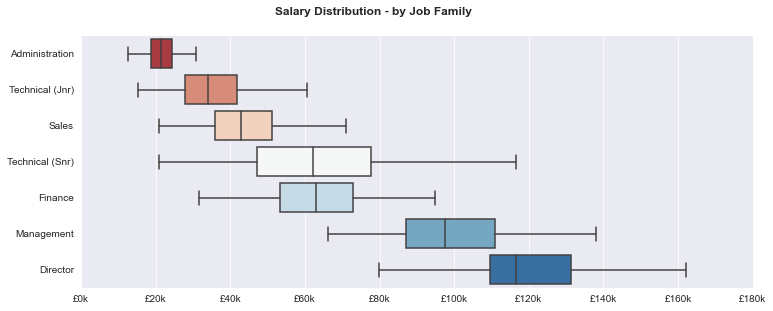

In [18]:
# Set up the box plot with the required logical ordering, size and removal of outliers
sal_by_ct = sns.catplot(x='salary',
                        y='job_family',
                        data=sal,
                        kind='box',
                        showfliers=True,
                        height=5,
                        aspect=13/6,
                        palette='RdBu',
                        order=['Administration', 'Technical (Jnr)', 'Sales',
                               'Technical (Snr)', 'Finance',
                               'Management', 'Director'])

# Get the ticks from the x axis
ticks = sal_by_ct.axes[0][0].get_xticks()

# Change the formatting for each of the ticks
xlabels = [f"{'£'}{x/1000:,.0f}{'k'}" for x in ticks]

# Set the formatting for the ticks
sal_by_ct.set_xticklabels(xlabels)

# Adjust spacing and set the chart and axe's titles
sal_by_ct.fig.subplots_adjust(top=0.9, bottom=0.2)
sal_by_ct.fig.suptitle('Salary Distribution - by Job Family',
                        fontsize=12, fontweight='bold')
sal_by_ct.set(xlabel='', ylabel='')

plt.show()

#### Salary Distribution - by Gender

Let's take a look at how the company is performing with regards to the gender pay gap and heacount by gender.

#### Headcount - by Gender

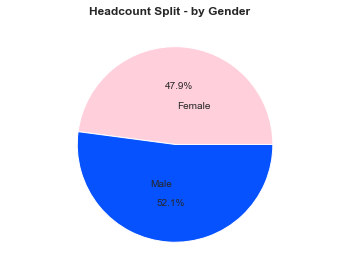

In [19]:
# Set custom colour scheme for the plot
colours = ["#FFCFDC", "#0652FF"]
sal['employee_id'].groupby(sal['gender']).count().plot(kind='pie',
                                                       colors=colours,
                                                       autopct='%.1f%%',
                                                       labeldistance=0.4)
# Set properties for the visual aspects of the pie chart
plt.axis('equal')
plt.ylabel('')
plt.suptitle('Headcount Split - by Gender', fontsize=12, fontweight='bold')
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['patch.edgecolor'] = 'black'

plt.show()

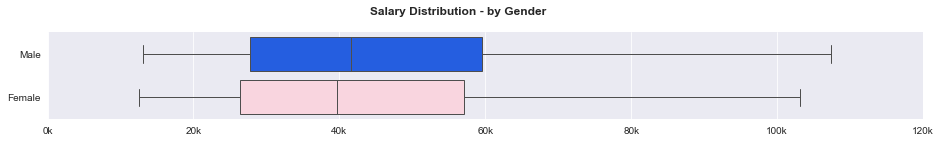

In [20]:
# Set custom colour scheme for the plot
colours = ["#0652FF", "#FFCFDC"]

# Set up the box plot with the required logical ordering, size and removal of outliers
sal_by_ct = sns.catplot(x='salary',
                        y='gender',
                        data=sal,
                        kind='box',
                        showfliers=False,
                        height=2,
                        aspect=33/5,
                        palette=colours,
                        order=['Male', 'Female'])

# Get the ticks from the x axis
ticks = sal_by_ct.axes[0][0].get_xticks()

# Change the formatting for each of the ticks
xlabels = [f"{x/1000:,.0f}{'k'}" for x in ticks]

# Set the formatting for the ticks
sal_by_ct.set_xticklabels(xlabels)

# Adjust spacing and set the chart and axe's titles
sal_by_ct.fig.subplots_adjust(top=0.8, bottom=0.2)
sal_by_ct.fig.suptitle('Salary Distribution - by Gender',
                        fontsize=12, fontweight='bold')

# Clear the labels for the x and y axis
sal_by_ct.set(xlabel='', ylabel='')

plt.show()

The analysis shows that with the outliers removed, there is still some progress to be made for the organisation to meet its gender pay gap objectives.

#### Headcount - by Age Band

/var/folders/dj/bxjbdk0j79d9j5lll_4ljctw0000gn/T/ipykernel_73748/576057345.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


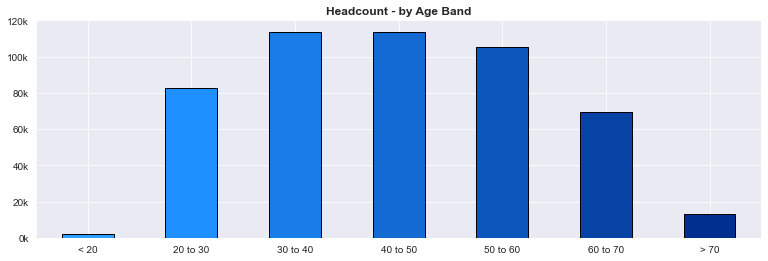

In [21]:
# Define the bins
bins = [0, 20, 30, 40, 50, 60, 70, 80]
age_bins = pd.cut(sal['age_in_years'], bins=bins, include_lowest=True)


colours = ['#2DA0FF', '#1E90FF', '#187DE9', '#126AD2', '#0C56BC', '#0643A5', '#00308F']

# Set the bin's axe's properties
ax = age_bins.value_counts(sort=False).plot.bar(rot=0,
                                                figsize=(13, 4),
                                                color=colours)

# Set the tick labels for the x axis
ax.set_xticklabels(
    [
        f"{int(cat.left)} to {int(cat.right)}".replace(
            '0 to 20', '< 20'
        ).replace('70 to 80', '> 70')
        for cat in age_bins.cat.categories
    ]
)


# Change the formatting for each of the ticks on the y axis
ylabels = [f'{y / 1000:,.0f}k' for y in ticks]

# Set the formatting for the ticks
ax.set_yticklabels(ylabels)

# Set the y axis' parameters
ax.set_ylim([0, 12000])

# Clear the labels for the x and y axis
ax.set(xlabel='', ylabel='')

# Set the title for the chart'
plt.title(label='Headcount - by Age Band', fontweight='bold')

plt.show()